# **ELG 7172B : **: Homework 4 Solutions

##### Solutions are provided by Srinivas Ayachitula  and Xiaoyan Li

### Instructions:

+ Upload your answers in an ipython notebook to UOttawa Bright Space.

+ Your individual submissions should use the following filenames: ELG_7172B_YOURNAME_HW4.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different format. 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: ELG_7172B_YOURNAME_HW4.tar.gz or ELG_7172B_YOURNAME_HW4.zip



_ _ _ _ _

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats as stats

# Problem 1:
Using the following sample data: 4.94, 5.06, 4.53, 5.07, 4.99, 5.16, 4.38, 4.43, 4.93, 4.72, 4.92, 4.96 <br>
a) Compute the mean and its standard error (from the standard deviation) and the median. <br>
b) Compute bootstrap estimates of the mean and median with estimates of their standard errors, using B = 1000 resamples. Also compute the median of the median estimates. <br>
c) Compare the results of parts a) and b). <br>



**Please answer this problem by adding cells here.**

In [28]:
#a

import numpy as np
Sdata=np.array([4.94, 5.06, 4.53, 5.07, 4.99, 5.16, 4.38, 4.43, 4.93, 4.72, 4.92, 4.96])
mean=np.mean(Sdata)             # mean of the data
print("The mean of the sample data is ",mean)
std=np.std(Sdata)              # standard deviation of data            
SE=std/(np.sqrt(len(Sdata)))   # standard error of data
print("The standard error of sample data is ",SE)
median=np.median(Sdata)       # median of the data
print("The median of the sample data is ",median)

The mean of the sample data is  4.84083333333
The standard error of sample data is  0.0724229315792
The median of the sample data is  4.935


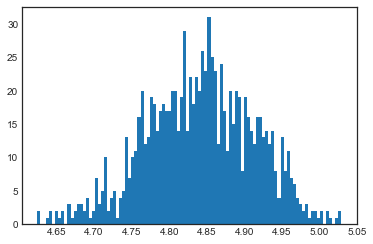

bootstrap estimates for mean  4.84083833333
boot standrad error for bootstrap mean estimates: is  0.0724092920873

 bootstrap estimates for median  4.935
boot standrad error for bootstrap median estimates is:  0.0987913697381
Median of the median estimates 4.93


In [29]:
#b


import numpy as np

#bootstrap mean
n=len(Sdata)
R = 1000
s = [Sdata[np.random.randint(0,n,n)].mean() for i in range(R)]
boot_mean = np.sum(s)/R                       # bootstrap sample mean

plt.hist(s, bins=100)
plt.show()
print("bootstrap estimates for mean ",boot_mean)

boot_mean_var = ((np.array(s) - boot_mean) ** 2).sum() / (R-1)
boot_std=np.sqrt(boot_mean_var)  
boot_Se=boot_std
# standard error for boostrap is equal to the standard deviation of the sample
print('boot standrad error for bootstrap mean estimates: is ', boot_Se)


#bootstrap median
s = [Sdata[np.random.randint(0,n,n)] for i in range(R)]
c=[]
for i in range(R):
    c.append(np.median(s[i]))
boot_median=np.median(c)
print("\n bootstrap estimates for median ",boot_median)

boot_median_var = ((np.array(c) - boot_median) ** 2).sum() / (R-1)
boot_std=np.sqrt(boot_median_var)
boot_Se=boot_std


print('boot standrad error for bootstrap median estimates is: ', boot_Se)



print("Median of the median estimates",np.median(s))



## (c)

From (a) and (b) we got almost same values for mean , median and the standard error.


# Problem 2:
(2 points) Outliers can strongly influence statistics such as the mean and the least-squares line. The following data contains a low outlier in the value 29.12: 
41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 42.07, 44.83, 29.12, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 39.67, 43.89, 43.89, 42.16. <br>
a) Generate a boxplot of the data to identify 29.12 as an outlier. <br>
b) Bootstrap the data and obtain bootstrap mean with and without the outlier. Plot histograms of the resampling distributions of the bootstrap means. How does the outlier influence the shape and bias of the bootstrap distribution? <br>
c) Find 95% confidence intervals for the population mean from both bootstrap distributions. Discuss the differences. <br>


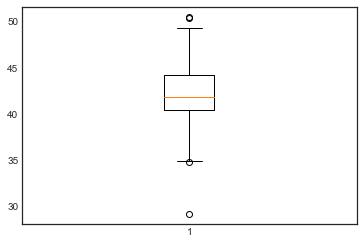

outlier is  29.12


In [30]:
#a

import matplotlib.pyplot as plt
import numpy as np


data=np.array([41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 
                42.07, 44.83, 29.12, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 
                39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 
                39.67, 43.89, 43.89, 42.16])
plt.boxplot(data)

plt.show()


std=np.std(data)
mean=np.mean(data)
minRange=mean-3*std
maxRange=mean+3*std


outliercheck=29.12

for i in range(0,len(data)):
    if(data[i] < minRange): 
        print('outlier is ',data[i])
    if(data[i]>maxRange):
        print('outlier is ',data[i])


bootstrap estimates for mean with outlier  42.18178125
Bias with outlier is  -0.00396875


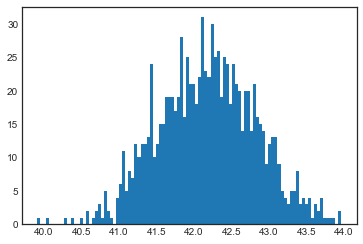


 95% Confidence interval for data with outlier is
[ 41.00275  43.46975]
bootstrap estimates for mean without outlier  42.5335084615
Bias without outlier is  0.0127392307692


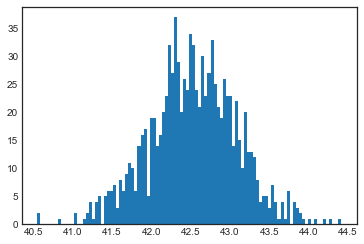


 95% Confidence interval for data without outlier is 
[ 41.41948718  43.65358974]


In [31]:
#b

#data with outlier
data=np.array([41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 
                42.07, 44.83, 29.12, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 
                39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 
                39.67, 43.89, 43.89, 42.16])
n=len(data)
R = 1000
s = [data[np.random.randint(0,n,n)].mean() for i in range(R)]
boot_mean = np.sum(s)/R
bias=boot_mean-np.mean(data)
print("bootstrap estimates for mean with outlier ",boot_mean)
print("Bias with outlier is ",bias)
plt.hist(s,bins=100)
plt.show()

s_sorted = np.sort(s)
alpha = 0.05
print("\n 95% Confidence interval for data with outlier is")
print(s_sorted[[int((R+1)*alpha/2), int((R+1)*(1-alpha/2))]])


#data without outlier
dataO=np.array([41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 
                42.07, 44.83, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 
                39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 
                39.67, 43.89, 43.89, 42.16])


n1=len(dataO)
R = 1000
sO = [dataO[np.random.randint(0,n1,n1)].mean() for i in range(R)]
boot_meanO = np.sum(sO)/R
biasO=boot_meanO-np.mean(dataO)
print("bootstrap estimates for mean without outlier ",boot_meanO)
print("Bias without outlier is ",biasO)
plt.hist(sO,bins=100)
plt.show()

s_sortedO = np.sort(sO)
alphaO = 0.05
print("\n 95% Confidence interval for data without outlier is ")
print(s_sortedO[[int((R+1)*alphaO/2), int((R+1)*(1-alphaO/2))]])







## (c)
From the above output we can observe that :

1)The mean of the data with outlier is less than the mean of the data without outlier

2)Bias of the data with outlier is less than the bias of the data without outlier

3)The shape of the boostrap distribution without outlier is narrow than the distribution with outlier

4)Confidence intervals for data with outlier is narrow than the confidence interval for data without outlier

**Please answer this problem by adding cells here.**

# Problem 3:

Implement code in Python using the sample code on Bright Space (Monte Carlo Code Example.ipynb) so that you reproduce figures  3.6-3.8 and results that correspond to these figures from the book Understanding Computational Bayesian Statistics. Please make sure that you read whole chapter 3 from the book. <br>
a)	(3 points) Use acceptance-rejection sampling as explained in the book Understanding Computational Bayesian Statistics on page 54. <br>
b)	(Bonus 2 points) Use importance sampling from Monte Carlo Code Example.ipynb.<br>
c)	(Bonus 4 points Research) Instead of using code from Monte Carlo Code Example.ipynb, install chaospy (http://chaospy.readthedocs.io/en/master/montecarlo.html) using Latin Hypercube and at least one more sampling techniques. Show the results using these techniques. Write a small description on Latin Hypercube sampling and about the other method you selected. <br>


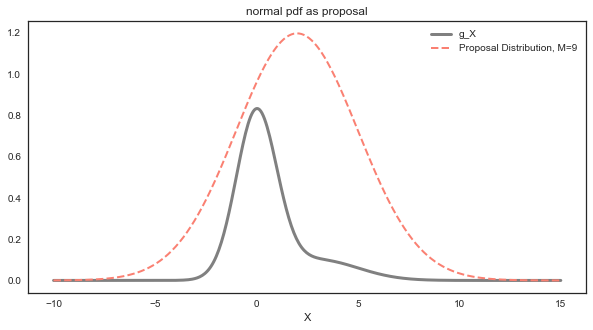

The sample mean is 0.6073820547945633


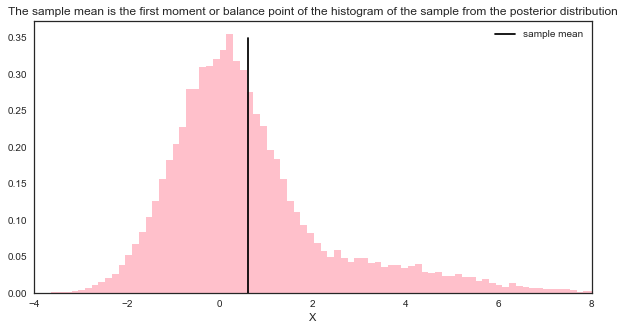

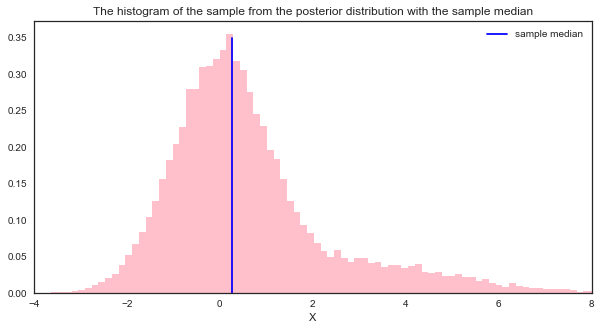

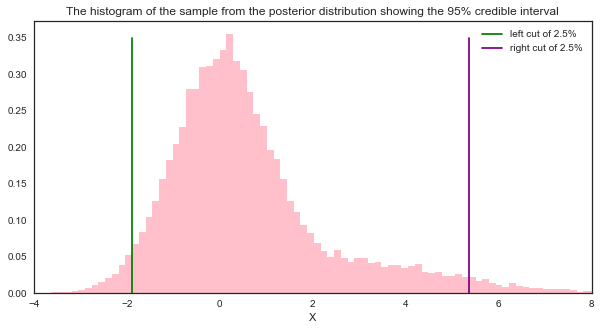

In [26]:
from functools import partial 
from scipy.stats import norm
def g_X(x):
    return 0.8*np.exp(-0.5*x**2) + 0.1*np.exp(-0.125*(x-3)**2)

def normal_dist(mu, sigma, x=None, n=None):
    if x is not None:
        return norm.pdf(x, mu, sigma)
    elif n is not None:
        return np.random.normal(mu, sigma, n)
    else:
        return None
        
prop_1=partial(normal_dist, mu=2, sigma=3)
M_1=9

fig,ax1=plt.subplots(1,1, figsize=(10,5))
x=np.linspace(-10,15,400)
ax1.plot(x, list(map(g_X, x)), color='gray', linewidth=3, label='g_X' )
ax1.plot(x, M_1*prop_1(x=x), '--', color='salmon', linewidth=2, label='Proposal Distribution, M='+str(M_1) )
ax1.set_xlabel('X')
ax1.set_title('normal pdf as proposal')
ax1.legend(loc='best')
plt.show()


def rejection(n, prop_dist, M, true_dist):
    samples =[]
    while len(samples)<n:
        sample=prop_dist(n=1)
        if np.random.uniform(0, M*prop_dist(x=sample)) <=true_dist(sample):
            samples.append(sample[0])
    return samples
    

n_samples=31502
x_samples = rejection(n_samples, prop_1, M_1, g_X)

# plot sample mean
mean_rej=np.mean(x_samples)
print('The sample mean is {0}'.format(mean_rej))
fig,ax1=plt.subplots(1,1, figsize=(10,5))
ax1.hist(x_samples, bins=100, normed=True, color='pink', linewidth=0)
ax1.plot([mean_rej,mean_rej], [0,0.35], '-', color='black', label='sample mean' )
ax1.set_xlabel('X')
ax1.set_xlim(-4,8)
ax1.set_title('The sample mean is the first moment or balance point of the histogram of the sample from the posterior distribution')
ax1.legend(loc='best')
plt.show()

# plot sample median
x_samples_sorted=np.sort(x_samples) # sort the samples
x_samples_left_half=x_samples_sorted[0:int(n_samples/2)] # the left half
x_samples_right_half=x_samples_sorted[int(n_samples/2):] # the right half
median_rej=0.5*(x_samples_sorted[int(n_samples/2)-1] + x_samples_sorted[int(n_samples/2)]) # sample median
#median_rej=np.median(x_samples)
fig,ax1=plt.subplots(1,1, figsize=(10,5))
#ax1.hist(x_samples_left_half, bins=50, normed=True, color='red', linewidth=0)
#ax1.hist(x_samples_right_half, bins=50, normed=True, color='blue', linewidth=0)
ax1.hist(x_samples, bins=100, normed=True, color='pink', linewidth=0)
ax1.plot([median_rej,median_rej], [0,0.35], '-', color='blue', label='sample median' )
ax1.set_xlabel('X')
ax1.set_xlim(-4,8)
ax1.set_title('The histogram of the sample from the posterior distribution with the sample median')
ax1.legend(loc='best')
plt.show()

# show 95% credible interval
n_samples_each_tail=int(0.025*n_samples)
left_rej=x_samples_sorted[n_samples_each_tail-1]
right_rej=x_samples_sorted[-n_samples_each_tail]
fig,ax1=plt.subplots(1,1, figsize=(10,5))
ax1.hist(x_samples, bins=100, normed=True, color='pink', linewidth=0)
ax1.plot([left_rej,left_rej], [0,0.35], '-', color='green', label='left cut of 2.5%' )
ax1.plot([right_rej,right_rej], [0,0.35], '-', color='purple', label='right cut of 2.5%' )
ax1.set_xlabel('X')
ax1.set_xlim(-4,8)
ax1.set_title('The histogram of the sample from the posterior distribution showing the 95% credible interval')
ax1.legend(loc='best')
plt.show()


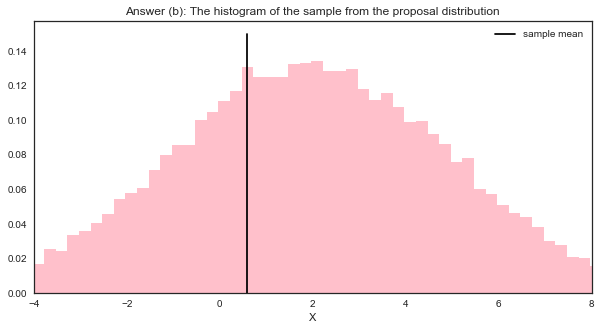

In [27]:
def importance(n, prop_dist, g_X):
    samples=prop_dist(n=n)
    weights=np.multiply( list(map(g_X,samples)), prop_dist(x=samples)**-1 )
    weights=weights/np.sum(weights) # normalize weights
    return samples, weights
    
x_samples,weights = importance(n_samples, prop_1, g_X)

#ind=np.logical_and((x_samples>=-4), (x_samples<=8))
#x_samples=x_samples[ind]
#weights=weights[ind]

mean_imp=np.sum( x_samples*weights )
#normalization_constant=np.sum( np.array(map(g_X,x_samples)) * weights )

#median_imp= np.median(x_samples*weights)
#left_imp=np.percentile(x_samples*weights,2.5)
#right_imp=np.percentile(x_samples*weights,97.5)

# draw sample mean, sample median, credible interval together
fig,ax1=plt.subplots(1,1, figsize=(10,5))
ax1.hist(x_samples, bins=100, normed=True, color='pink', linewidth=0)
ax1.plot([mean_imp,mean_imp], [0,0.15], '-', color='black', label='sample mean' )
#ax1.plot([median_imp,median_imp], [0,0.35], '-', color='blue', label='sample median' )
#ax1.plot([left_imp,left_imp], [0,0.35], '-', color='green', label='left cut of 2.5%' )
#ax1.plot([right_imp,right_imp], [0,0.35], '-', color='purple', label='right cut of 2.5%' )
ax1.set_xlabel('X')
ax1.set_xlim(-4,8)
# with the sample mean, sample median, and the 95% credible interval
ax1.set_title('Answer (b): The histogram of the sample from the proposal distribution')
ax1.legend(loc='best')
plt.show()


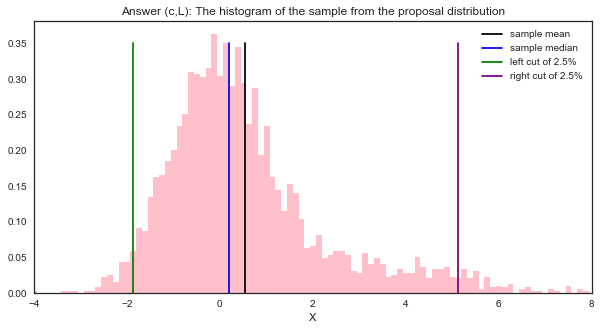

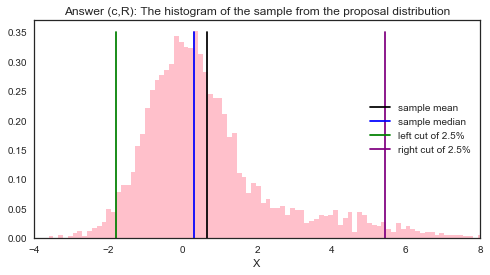

In [28]:
# Answer (c)
import chaospy as cp
def normal_dist2(mu, sigma, x=None, n=None, method="L"):
    if x is not None:
        return norm.pdf(x, mu, sigma)
    elif n is not None:
        return cp.samplegen(n, cp.Normal(mu,sigma), method) 
    else:
        return None
        
# use Latin hypercube sampling
prop_L=partial(normal_dist2, mu=2, sigma=3, method="L") #L: Latin hypercube: total number of samples is considered, to ensure that one sample for each axis of a hypercube. This method is too slow.
M_2=9
n_samples=3152

x_samples = rejection(n_samples, prop_L, M_2, g_X)
x_samples=np.array(x_samples)
x_samples.shape=(x_samples.size,)

mean_cp=np.mean(x_samples)
median_cp= np.median(x_samples)
left_cp=np.percentile(x_samples,2.5)
right_cp=np.percentile(x_samples,97.5)

fig,ax1=plt.subplots(1,1, figsize=(10,5))
ax1.hist(x_samples, bins=100, normed=True, color='pink', linewidth=0)
ax1.plot([mean_cp,mean_cp], [0,0.35], '-', color='black', label='sample mean' )
ax1.plot([median_cp,median_cp], [0,0.35], '-', color='blue', label='sample median' )
ax1.plot([left_cp,left_cp], [0,0.35], '-', color='green', label='left cut of 2.5%' )
ax1.plot([right_cp,right_cp], [0,0.35], '-', color='purple', label='right cut of 2.5%' )
ax1.set_xlabel('X')
ax1.set_xlim(-4,8)
# with the sample mean, sample median, and the 95% credible interval
ax1.set_title('Answer (c,L): The histogram of the sample from the proposal distribution')
ax1.legend(loc='best')
plt.show()

# (Pseudo-)Random sampling: sampling based on pseudo random generator from uniform distribution
prop_R=partial(normal_dist2, mu=2, sigma=3, method="R") # R: (Pseudo-)Random
x_samples = rejection(n_samples, prop_R, M_2, g_X)
x_samples=np.array(x_samples)
x_samples.shape=(x_samples.size,)

mean_cp=np.mean(x_samples)
median_cp= np.median(x_samples)
left_cp=np.percentile(x_samples,2.5)
right_cp=np.percentile(x_samples,97.5)

fig,ax1=plt.subplots(1,1, figsize=(8,4))
ax1.hist(x_samples, bins=100, normed=True, color='pink', linewidth=0)
ax1.plot([mean_cp,mean_cp], [0,0.35], '-', color='black', label='sample mean' )
ax1.plot([median_cp,median_cp], [0,0.35], '-', color='blue', label='sample median' )
ax1.plot([left_cp,left_cp], [0,0.35], '-', color='green', label='left cut of 2.5%' )
ax1.plot([right_cp,right_cp], [0,0.35], '-', color='purple', label='right cut of 2.5%' )
ax1.set_xlabel('X')
ax1.set_xlim(-4,8)
# with the sample mean, sample median, and the 95% credible interval
ax1.set_title('Answer (c,R): The histogram of the sample from the proposal distribution')
ax1.legend(loc='best')
plt.show()

## 3.(b)

**Please answer this problem by adding cells here.**

# Problem 4:
(3 point) In order to determine that there is significant evidence at 98% level of confidence that the mean calcium level of two types of products differ by more than 5 units, independent analysis of these two products was done. 20 samples of the first products were tested and the following results were obtained: mean = 21.3 and standard deviation = 1.8. 15 samples of the second product were tested with the mean of 14.2 and standard deviation of 2.4. Measurements of both products follow normal distribution. <br>
To determine that one product has higher calcium level then the other at 98% confidence level is the same as determining if confidence intervals of difference of the means of the concentration levels of two products does not include value 5 at 98% level. Compute confidence level of the difference using the hint below and comment on if the difference is significant or not.
<br><br>
Hint: In one of the previous assignments, you worked on obtaining the mean and standard deviation of the sum of two random variables. In this example, we are looking at the difference between two random variables and we are trying to compute the confidence intervals of the difference. This is very important problem in statistics where it is important to observe if the data generated using new method/process/medicine significantly differ from the data generated using a traditional way. You know that the difference of two Gaussian random variables is also a random variable. Therefore use a formula that we had in the class for computing confidence intervals for the normal random variable but replace the mean and the variance with the mean and the variance of the difference of the random variables from the assignment #2. Please also note that both standard deviations need to be scaled with $\sqrt(n_1)$ and $\sqrt(n_2)$ respectively.   <br>


# Solution

Given Mean of the first product is 21.3
Mean of second product is 14.2
Standard deviation of the first product is 1.8
standard deviation of the second product is 2.4

$$ \mu_1 = 21.3$$
$$ \mu_2 = 14.2 $$
$$ \sigma_1 = 1.8 $$
$$ \sigma_2 = 2.4 $$
$$ n1=20 $$
$$ n2=15 $$

we know 
$$ \mu_{x-y} = \mu_x - \mu_y $$

Mean for the difference of two random variables
$$ \mu_{1-2} = \mu_1 - \mu_2 $$
$$= 21.3 - 14.2 $$
$$ \mu_{1-2} = 7.1 $$

we know Standard deviation for difference of two random varibles is
$$ \sigma_{1-2}=\sqrt{ \frac{{\sigma_1}^2}{n1} + \frac{{\sigma_2}^2}{n2} } $$

$$\sigma_{1-2}= \sqrt{ \frac{{1.8}^2}{20} + \frac{{2.4}^2}{15} } $$
$$\sigma_{1-2}= 0.738 $$

To find confidence interval we know 

$$ \mu \pm t_{value} * \sigma $$

As the number of samples are different we need to find degree of freedom using n1 and n2 by the below formula

$$ v =\frac{\Bigg(\frac{\sigma_x^2}{n_1} + \frac{\sigma_y^2}{n_2}\Bigg)^2} {\frac{(\frac{\sigma_x^2}{n_1})^2}{n_1-1}+\frac{(\frac{\sigma_y^2}{n_2})^2}{n_2-1}} $$

$$ v = \frac{\Bigg(\frac{1.8^2}{20} + \frac{2.4^2}{15}\Bigg)^2} {\frac{(\frac{1.8^2}{20})^2}{20-1}+\frac{(\frac{2.4^2}{15})^2}{15-1}}$$

$$ v= 25.02 $$

As the confidence interval is 98% the value of $\alpha$=0.01

By using the degree of freedom , alpha value in t distribution table 

$$t_{value} = 2.486 $$

Confidence interval of lower 

$$ \mu_{diff} - t_{value} * \sigma_{diff} $$

$$= 7.1 + 2.486 * 0.738 $$

Confidence interval of lower = 5.26

Confidence interval of Higher

$$ \mu_{diff} + t_{value} * \sigma_{diff} $$

$$= 7.1 - 2.486 * 0.738 $$


Confidence interval of Higher = 8.93


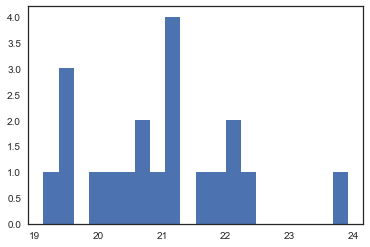

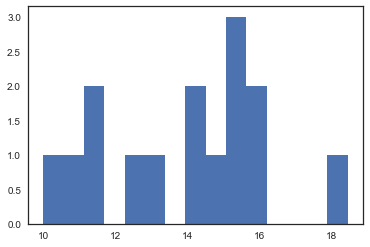

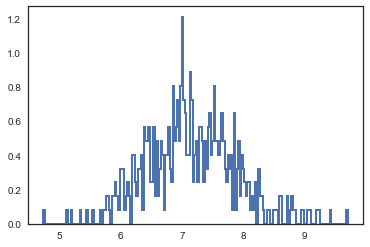

25.022674088378967
Confidence intervals are  5.2630495336  and  8.9369504664
Difference mean is  7.100000000000001
Difference standard deviation is  0.738918128076


In [5]:
# 4

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats

n1=20
n2=15
mean_x = 21.3                                                  # mean of x
std_x=1.8                                                      # standard deviation of x

mean_y = 14.2                                                  # mean of y
std_y=2.4                                                     # standard deviation of y

x = np.random.normal(loc=mean_x, scale=std_x, size=20)   # generating normal distribution for x with 20 samples
y = np.random.normal(loc=mean_y, scale=std_y, size=15)   # generating normal distribution for y with 15 samples
plt.hist(x,bins=20)
plt.show()

plt.hist(y,bins=15)
plt.show()


meandiff=mean_x-mean_y                                      # mean of X-Y distribution
vardiff=((std_x**2)/n1)+((std_y**2)/n2)
stddiff=np.sqrt(vardiff)                              # standard deviation of  X-Y distribution


diff= np.random.normal(loc=meandiff, scale=stddiff, size=500) # generating normal distribution using mean diff and sd diff
plt.hist(diff, bins=200, normed=True, histtype='step', lw=2)
plt.show()

#finding 98% confidence interval

DOF=(((std_x**2/n1)+(std_y**2/n2))**2)/((((std_x**2)/n1)**2)/(n1-1)+(((std_y**2)/n2)**2)/(n2-1)) # degree of freedom for different number of samples
alpha=0.01  # 98% confidence interval
tvalue=2.486  # from t distribution table using alpha and degree of freedom
CIL= meandiff-tvalue*stddiff
CIU= meandiff+tvalue*stddiff
print(DOF)

print('Confidence intervals are ',CIL, ' and ', CIU)
print('Difference mean is ',meandiff)
print('Difference standard deviation is ',stddiff)


confidence intervals of difference of the means of the concentration levels of two products does not include value 5 at 98% level and this shows one product has higher calcium level then the other at 98% confidence level.

 From the above code we can see the significant evidence at 98% level of confidence by seeing their intervals that the mean calcium level of two types of products differ by more than 5 units which may be 5.26 to 8.93 

In [10]:
scipy.stats.t.ppf(1-0.01, 25)

2.4851071754106413